# Locating dune toe on cross-shore beach transects.

_This notebook is from the [pybeach](https://pybeach.readthedocs.io/en/latest/background.html) tutorial examples._

:::{important}
Dunes along sandy coastlines provide an important natural barrier to coastal hazards such as storm-induced waves and surge. The capacity of sandy dunes to provide coastal hazard protection depends in large part on their geometry. In particular, the location of the dune toe (the transition point between the beach and dune) is a key factor used in coastal erosion models and for assessing coastal vulnerability to hazards. 
:::

[pybeach](https://pybeach.readthedocs.io/en/latest/background.html) is a `Python` package for locating the dune toe on cross-shore beach profile transects. The aim of pybeach is to collate commonly used algorithms for dune toe identification and to provide a new method of locating the dune toe based on machine learning.

In [1]:
import os
import pickle
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from beach.beach import Profile
from beach.support import data_support as ds
from beach.support import classifier_support as cs
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 

import warnings
warnings.simplefilter("ignore", UserWarning)

In [3]:
# example data
x = np.arange(0, 80, 0.5)
z = np.concatenate((np.linspace(4, 5, 40),
                    np.linspace(5, 2, 10),
                    np.linspace(2, 0, 91)[1:],
                    np.linspace(0, -1, 20)))

# instantiate
p = Profile(x, z)

# predict dune toe, dune crest, shoreline location
toe_ml, prob_ml = p.predict_dunetoe_ml('wave_embayed_clf')  # predict toe using machine learning model
toe_mc = p.predict_dunetoe_mc()    # predict toe using maximum curvature method (Stockdon et al, 2007)
toe_rr = p.predict_dunetoe_rr()    # predict toe using relative relief method (Wernette et al, 2016)
toe_pd = p.predict_dunetoe_pd()    # predict toe using perpendicular distance method
crest = p.predict_dunecrest()      # predict dune crest
shoreline = p.predict_shoreline()  # predict shoreline

In [14]:
# Plotting Paramaters
params = {'legend.fontsize': 10,
           'axes.labelsize': 10,
           'axes.labelweight': 'regular',
           'axes.titlesize': 11,
           'axes.titleweight': 'regular',
           'xtick.labelsize': 10,
           'ytick.labelsize': 10,
           'mathtext.default':'regular'}
plt.rcParams.update(params)

# example data
x = np.arange(0, 80, 0.5)
z = np.concatenate((np.linspace(4, 5, 40),
                    np.linspace(5, 2, 10),
                    np.linspace(2, 0, 91)[1:],
                    np.linspace(0, -1, 20)))

# instantiate
p = Profile(x, z)

In [15]:
# Predict dune toe location
toe_ml = p.predict_dunetoe_ml('wave_embayed_clf') # use the machine learning (ML) method
toe_mc = p.predict_dunetoe_mc() # use the maximum curvature (MC) method
toe_rr = p.predict_dunetoe_rr() # use the relative relief (RR) method
toe_pd = p.predict_dunetoe_pd() # use the perpendicular distance (PD) method

In [16]:
# Predict shoreline and dune crest location
crest = p.predict_dunecrest()
shoreline = p.predict_shoreline()

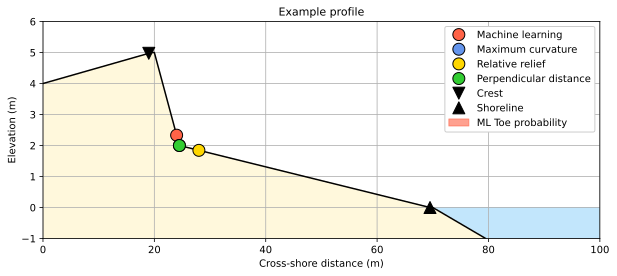

In [17]:
n=0
fig, axes = plt.subplots(1, 1, figsize=(10, 4))
toes = [toe_ml[n], toe_mc[n], toe_rr[n], toe_pd[n]]

labels = ['Machine learning', 'Maximum curvature', 'Relative relief', 'Perpendicular distance']
colors = ['tomato', 'cornflowerblue', 'gold', 'limegreen']

axes.plot(x, z, '-k')
axes.fill_between([70, 100], [0, 0], y2=-1, color='lightskyblue', alpha=0.5)
axes.fill_between(x, z, y2=-1, color='cornsilk', alpha=1)
axes.axvspan(-10, -9, color='tomato', alpha = 0.6, label='ML Toe probability') # legend placeholder
for i, itoe in enumerate(toes): 
    axes.plot(x[itoe], z[itoe],
              'o', color=colors[i], ms=12, mec='k', label=labels[i])
axes.plot(x[crest[n]], z[crest[n]], 'v', color='k', ms=12, mec='k', label='Crest')
axes.plot(x[shoreline[n]], z[shoreline[n]], '^', color='k', ms=12, mec='k', label='Shoreline')
axes.set_xlim(0, 100)
axes.set_ylim(-1, 6)
axes.set_title('Example profile')
axes.set_xlabel('Cross-shore distance (m)')
axes.set_ylabel('Elevation (m)')
axes.grid()
axes.legend(framealpha=1)
fig.show()

### Load test data

In [18]:
# Load some test data of 200 profiles
with open('../pracenv/dataset/test_profiles.pkl', 'rb') as f:
    data = pickle.load(f)
x, z, toe = data['x'], data['z'], data['toe']

### 1. Predicting dune toes <a name="1"></a>

In [19]:
# Instantiate Profile class
p = Profile(x, z)
# Make predictions of dune toe
toe_ml, prob_ml = p.predict_dunetoe_ml('barrier_island_clf', dune_crest='rr', window_size=101, threshold=0.97)
toe_mc = p.predict_dunetoe_mc(dune_crest='rr', window_size=101, threshold=0.97)
toe_rr = p.predict_dunetoe_rr(dune_crest='rr', window_size=101, threshold=0.97, toe_threshold=0.2, verbose=False)
toe_pd = p.predict_dunetoe_pd(dune_crest='rr', window_size=101, threshold=0.97)
# Predict dune crest
crest = p.predict_dunecrest()
# Predict shoreline
shoreline = p.predict_shoreline()

### 2. Example plots and results <a name="2"></a>

In [5]:
# Plotting Paramaters
params = {'legend.fontsize': 10,
           'axes.labelsize': 10,
           'axes.labelweight': 'regular',
           'axes.titlesize': 11,
           'axes.titleweight': 'regular',
           'xtick.labelsize': 10,
           'ytick.labelsize': 10,
           'mathtext.default':'regular'}
plt.rcParams.update(params)

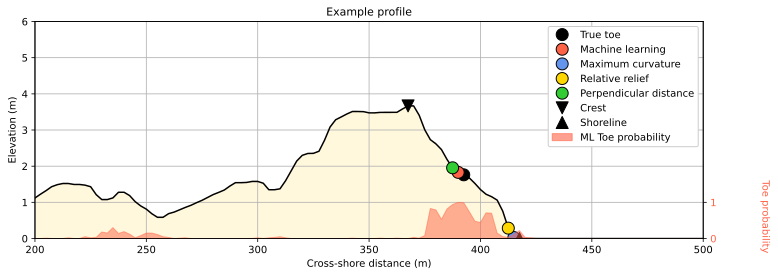

In [30]:
# Specify profile to plot
n = 60
# Figure metadata
fig, axes = plt.subplots(1, 1, figsize=(12, 4))
toes = [toe[n], toe_ml[n], toe_mc[n], toe_rr[n], toe_pd[n]]
labels = ['True toe', 'Machine learning', 'Maximum curvature', 'Relative relief', 'Perpendicular distance']
colors = ['k', 'tomato', 'cornflowerblue', 'gold', 'limegreen']
# Generate figure
axes.plot(x, z[n], '-k')
axes.fill_between([70, 100], [0, 0], y2=-1, color='lightskyblue', alpha=0.5)
axes.fill_between(x, z[n], y2=-1, color='cornsilk', alpha=1)
axes.axvspan(-10, -9, color='tomato', alpha = 0.6, label='ML Toe probability') # legend placeholder
for i, itoe in enumerate(toes): 
    axes.plot(x[itoe], z[n, itoe],
              'o', color=colors[i], ms=12, mec='k', label=labels[i])
axes.plot(x[crest[n]], z[n, crest[n]], 'v', color='k', ms=12, mec='k', label='Crest')
axes.plot(x[shoreline[n]], z[n, shoreline[n]], '^', color='k', ms=12, mec='k', label='Shoreline')
axes.set_xlim(200, 500)
axes.set_ylim(0, 6)
axes.set_title('Example profile')
axes.set_xlabel('Cross-shore distance (m)')
axes.set_ylabel('Elevation (m)')
axes.grid()
axes.legend(framealpha=1)
# Plot dune toe ML probability
axes2 = axes.twinx() 
axes2.fill_between(x, prob_ml[n], color='tomato', alpha=0.5)
axes2.set_ylim(0, 6)
axes2.set_yticks([0, 1])
axes2.tick_params(axis='y', labelcolor='tomato')
axes2.yaxis.set_label_coords(1.1, 0.1)
axes2.set_ylabel('Toe probability', color='tomato', rotation=270);

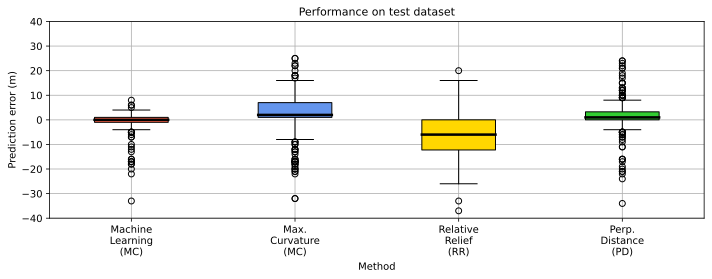

In [31]:
# Figure metadata
fig, axes = plt.subplots(1, 1, figsize=(10,4))
colors = ['tomato', 'cornflowerblue', 'gold', 'limegreen']
labels = ['Machine\nLearning\n(MC)', 'Max.\nCurvature\n(MC)', 'Relative\nRelief\n(RR)', 'Perp.\nDistance\n(PD)']
# Generate figure
data = (toe - np.vstack((toe_ml, toe_mc, toe_rr, toe_pd))).T.astype("float64")
# data1[:,2] *= 0.7
bplot = axes.boxplot(data,
                     labels=labels,
                     patch_artist=True,
                     medianprops = dict(linewidth=2.5, color='k'))
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
axes.set_ylabel('Prediction error (m)')
axes.set_xlabel('Method', labelpad=5)
axes.set_ylim(-40, 40)
axes.grid()
axes.set_title("Performance on test dataset")
plt.tight_layout()

In [32]:
df = pd.DataFrame({'MAE': [np.absolute(toe-toe_ml).mean(),
                           np.absolute(toe-toe_mc).mean(),
                           np.absolute(toe-toe_rr).mean(),
                           np.absolute(toe-toe_pd).mean()],
                   'RMSE': [np.sqrt(np.square(toe-toe_ml).mean()),
                            np.sqrt(np.square(toe-toe_mc).mean()),
                            np.sqrt(np.square(toe-toe_rr).mean()),
                            np.sqrt(np.square(toe-toe_pd).mean())],
                   'R2': [1 - (np.square(toe-toe_ml)).sum() / (np.square(toe-toe.mean())).sum(),
                          1 - (np.square(toe-toe_mc)).sum() / (np.square(toe-toe.mean())).sum(),
                          1 - (np.square(toe-toe_rr)).sum() / (np.square(toe-toe.mean())).sum(),
                          1 - (np.square(toe-toe_pd)).sum() / (np.square(toe-toe.mean())).sum()]},
                  index=['ML', 'MC', 'RR', 'PD']).round(2)
df

,MAE,RMSE,R2
ML,2.40,5.17,0.99
MC,7.59,10.57,0.96
RR,8.59,11.22,0.95
PD,5.18,8.22,0.98
